# Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("household_dataset.csv")

print("Dataset loaded successfully!")


Dataset loaded successfully!


# Types of Data

In [19]:
df.dtypes


Household_ID             object
Age_of_Household_Head     int64
Household_Income          int64
Education_Level          object
Family_Size               int64
Owns_House               object
Urban_Rural              object
dtype: object

# Measures of Central Tendency

## Mean

In [20]:
mean_age = df["Age_of_Household_Head"].mean()
mean_income = df["Household_Income"].mean()

print("Mean Age:", round(mean_age, 2))
print("Mean Income:", round(mean_income, 2))


Mean Age: 44.08
Mean Income: 46068.23


## Median

In [21]:
median_age = df["Age_of_Household_Head"].median()
median_income = df["Household_Income"].median()

print("Median Age:", median_age)
print("Median Income:", median_income)

Median Age: 44.5
Median Income: 45945.5


## Mode

In [22]:
mode_age = df["Age_of_Household_Head"].mode()[0]
mode_income = df["Household_Income"].mode()[0]

print("Mode Age:", mode_age)
print("Mode Income:", mode_income)

Mode Age: 47
Mode Income: 51180


## Interpretation of Central Tendency

### Age:
The mean (44.08) and median (44.5) are very close to each other. 
This indicates that the age distribution is approximately symmetric.

The mode (47) is slightly different but still close, which is acceptable in real-world data.

### Income:
The mean (46068.23) and median (45945.5) are also very close. 
This suggests that the income distribution is approximately normal.

Since Mean ≈ Median for both variables, the dataset does not show strong skewness.


# Measures of Dispersion (Household Income)

## Range

In [23]:
range_income = df["Household_Income"].max() - df["Household_Income"].min()

print("Range of Household Income:", range_income)

Range of Household Income: 75000


## Variance

In [24]:
var_income = df["Household_Income"].var()

print("Variance of Household Income:", round(var_income, 2))

Variance of Household Income: 136555783.68


## Standard Deviation

In [25]:
std_income = df["Household_Income"].std()

print("Standard Deviation of Household Income:", round(std_income, 2))

Standard Deviation of Household Income: 11685.71


# Interquartile Range (IQR) – Household Income

In [26]:
Q1 = df["Household_Income"].quantile(0.25)
Q3 = df["Household_Income"].quantile(0.75)

IQR = Q3 - Q1

print("Q1 (25th Percentile):", Q1)
print("Q3 (75th Percentile):", Q3)
print("IQR:", IQR)

Q1 (25th Percentile): 37729.5
Q3 (75th Percentile): 53246.5
IQR: 15517.0


## Comment on Income Spread

The IQR represents the range within which the middle 50% of household 
income values lie.

A moderate IQR indicates that income values are reasonably concentrated 
around the median.

Since the IQR is not extremely large compared to the total range, 
this suggests that income distribution does not have extreme variability 
in the central portion of the data.


# Histogram of Household Income

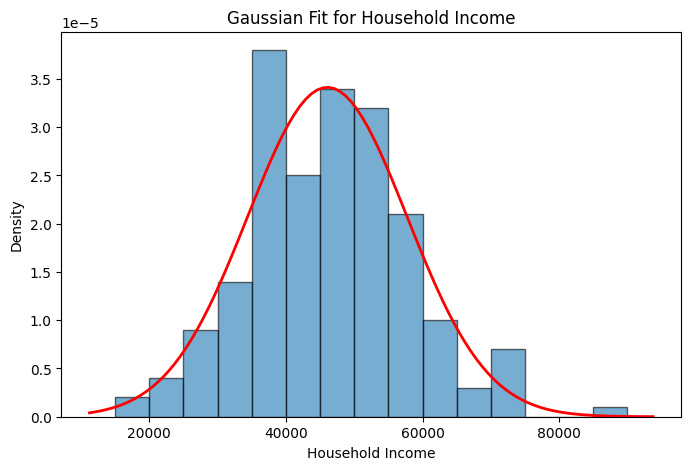

In [27]:
income = df["Household_Income"]

mu = income.mean()
sigma = income.std()

plt.figure(figsize=(8,5))
plt.hist(income, bins=15, density=True, edgecolor='black', alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p = stats.norm.pdf(x, mu, sigma)

plt.plot(x, p, 'r', linewidth=2)

plt.title("Gaussian Fit for Household Income")
plt.xlabel("Household Income")
plt.ylabel("Density")

plt.show()


# Skewness and Kurtosis – Household Income

In [28]:
skew_income = df["Household_Income"].skew()

kurt_income = df["Household_Income"].kurt()

print("Skewness of Household Income:", skew_income)
print("Kurtosis of Household Income:", kurt_income)

Skewness of Household Income: 0.25501179049883144
Kurtosis of Household Income: 0.4626543685809241


# Income Comparison Across Education Levels (Box Plot)

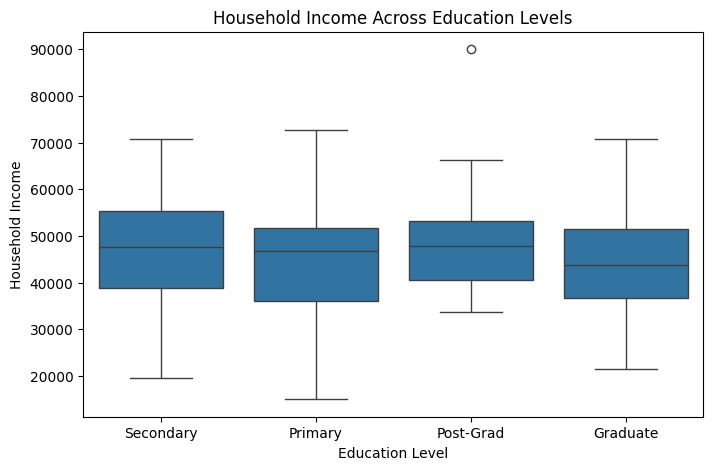

In [29]:
plt.figure(figsize=(8,5))

sns.boxplot(x="Education_Level", y="Household_Income", data=df)

plt.title("Household Income Across Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Household Income")

plt.show()

# Urban/Rural (Histogram)

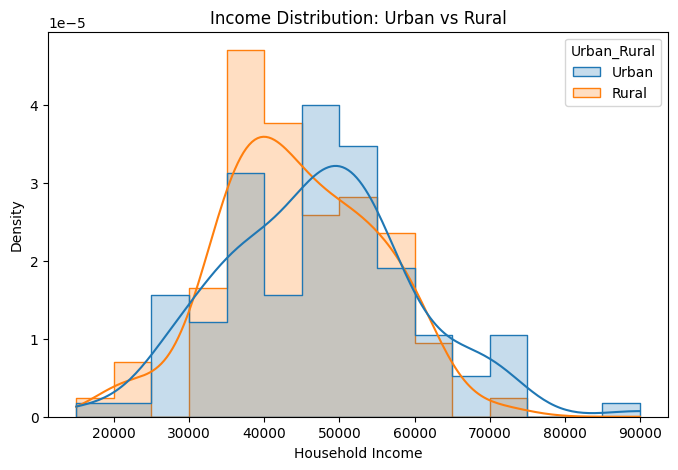

In [30]:
plt.figure(figsize=(8,5))

sns.histplot(data=df, 
             x="Household_Income", 
             hue="Urban_Rural",
             kde=True,
             element="step",
             stat="density",
             common_norm=False)

plt.title("Income Distribution: Urban vs Rural")
plt.xlabel("Household Income")
plt.ylabel("Density")

plt.show()

# Histogram with KDE – Household Income

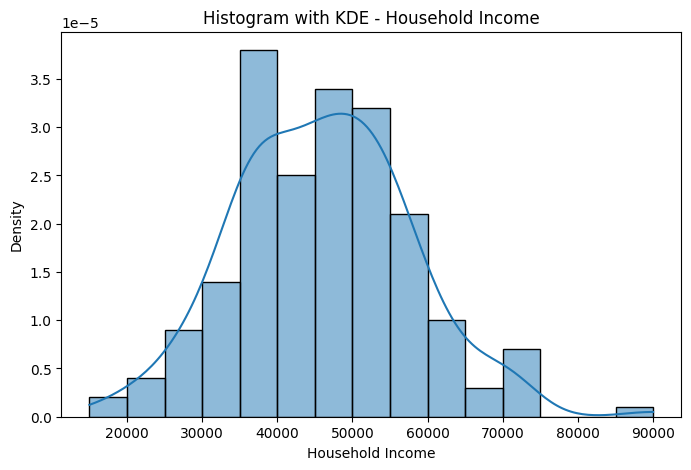

In [31]:
plt.figure(figsize=(8,5))

sns.histplot(df["Household_Income"],
             bins=15,
             kde=True,
             stat="density",
             edgecolor="black")

plt.title("Histogram with KDE - Household Income")
plt.xlabel("Household Income")
plt.ylabel("Density")

plt.show()

# Family Size Comparison by Education Level

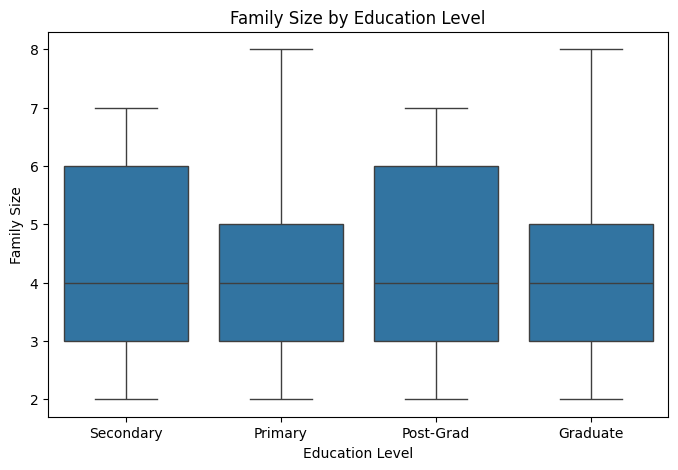

In [32]:
plt.figure(figsize=(8,5))

sns.boxplot(x="Education_Level", 
            y="Family_Size", 
            data=df)

plt.title("Family Size by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Family Size")

plt.show()

# Distribution Curve – Age vs Household Income

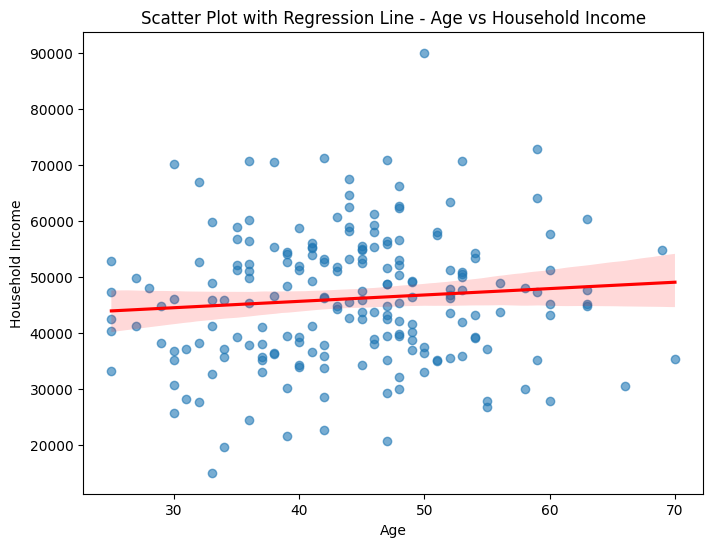

In [39]:
plt.figure(figsize=(8,6))

sns.regplot(
    x="Age_of_Household_Head",
    y="Household_Income",
    data=df,
    scatter_kws={"alpha":0.6},
    line_kws={"color":"red"}
)

plt.title("Scatter Plot with Regression Line - Age vs Household Income")
plt.xlabel("Age")
plt.ylabel("Household Income")

plt.show()